In [51]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy import optimize


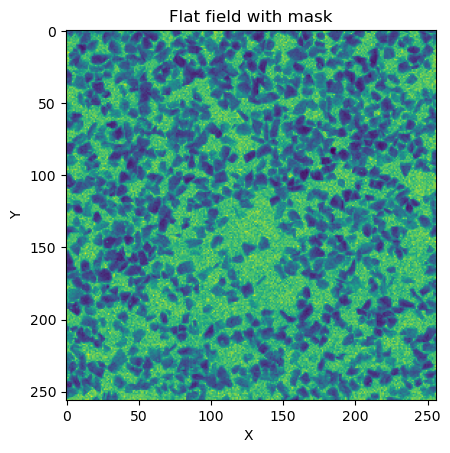

In [2]:
flat_data = np.rot90( np.genfromtxt("RAW_lija.txt"), 1)

mean_flat = np.mean(flat_data)

flat_data[np.where(flat_data == 0)] = mean_flat


plt.xlabel("X ")
plt.ylabel("Y")
plt.title("Flat field with mask")
plt.imshow(flat_data)
plt.savefig("Flat_data.png")

 

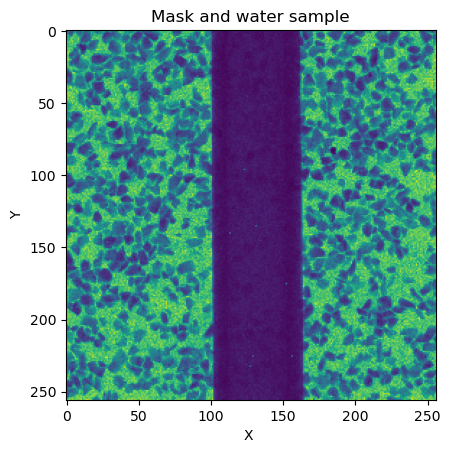

In [3]:
agua_data = np.rot90( np.genfromtxt("RAW_lija_tubo3_agua.txt"), 1 )

mean_agua = np.mean(agua_data)

agua_data[np.where(agua_data == 0)] = mean_agua


plt.xlabel("X ")
plt.ylabel("Y")
plt.title("Mask and water sample")
plt.imshow(agua_data)
plt.savefig("agua_data.png")

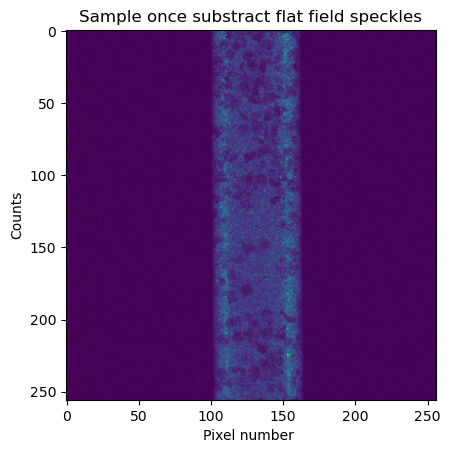

In [4]:
img = flat_data/agua_data

plt.imshow(img)
plt.xlabel("Pixel number ")
plt.ylabel("Counts")
plt.title("Sample once substract flat field speckles")
plt.savefig("Sample_subs_FFspeck.png")


Text(0.5, 1.0, 'Sample once substract flat field speckles')

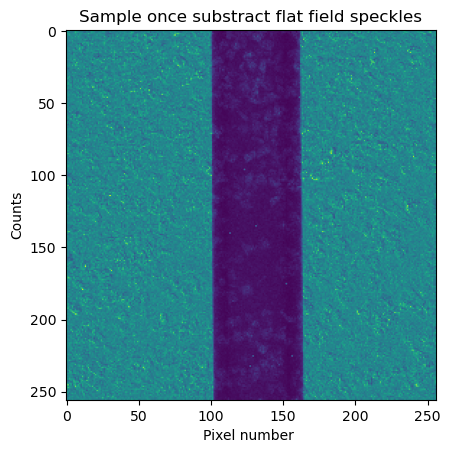

In [5]:
img = agua_data/flat_data

plt.imshow(img)
plt.xlabel("Pixel number ")
plt.ylabel("Counts")
plt.title("Sample once substract flat field speckles")

In [6]:
FFs = []
n_flats = 200

for i in range(n_flats):
    flat = np.genfromtxt("2. FF/FF_" + str(i).zfill(3) + ".txt")
    FFs.append(flat)
    
FFs = np.array(FFs)


In [7]:
FF = np.sum(FFs, axis=0)
mean_FF = np.mean(FF)

FF[np.where(FF == 0)] = mean_FF

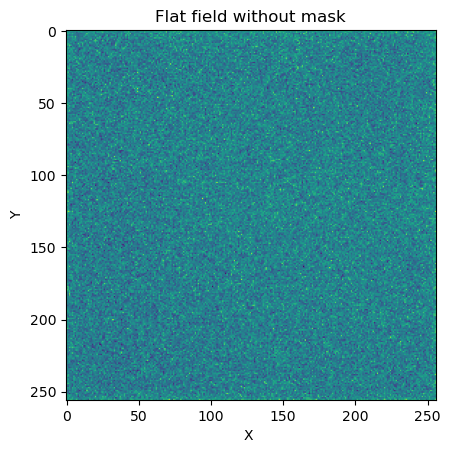

In [8]:

plt.xlabel("X ")
plt.ylabel("Y")
plt.title("Flat field without mask")
plt.imshow(FF)
plt.savefig("FF.png")

In [38]:
def Gaus(p,x):
    mu,sigma = p
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [40]:
#x = np.linspace(-6,6,100)
#plt.plot(x,Gaus(x,0,1))

In [41]:
def JointLikelihood(p,X):    
    return -np.sum( np.log(Gaus(p,X)) )

In [42]:
nll = lambda *p: JointLikelihood(*p)

In [47]:
p0 = [32500,2000]
param = optimize.minimize(nll,p0,args=(FF),options={"disp":True},method='Nelder-Mead')

Optimization terminated successfully.
         Current function value: 586560.127228
         Iterations: 54
         Function evaluations: 105


In [48]:
param.x

array([32493.84131119,  1865.45210488])

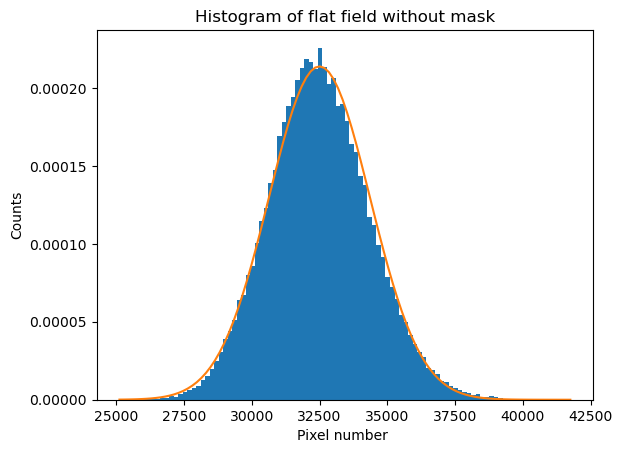

In [50]:
_x = np.linspace(np.min(FF),np.max(FF),100)
plt.hist(np.ravel(FF), bins=100, density=True)
plt.plot(_x,Gaus(param.x,_x))
plt.xlabel("Pixel number ")
plt.ylabel("Counts")
plt.title("Histogram of flat field without mask")
plt.savefig("HistogramFF.png")


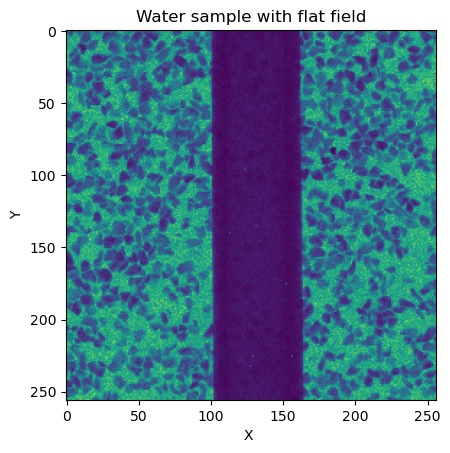

In [10]:
img2 = agua_data/FF
img3 = FF/agua_data

plt.imshow(img2)
plt.xlabel("X ")
plt.ylabel("Y")
plt.title("Water sample with flat field")
plt.savefig("Water_sample.png")


(array([65536.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([   0.,   30.,   60.,   90.,  120.,  150.,  180.,  210.,  240.,
         270.,  300.,  

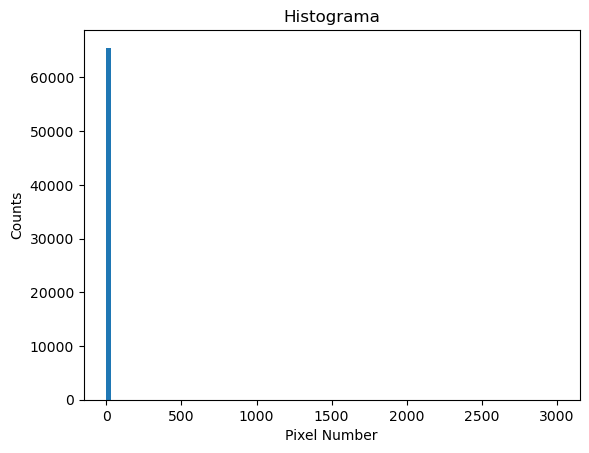

In [11]:

plt.xlabel("Pixel Number")
plt.ylabel("Counts")
plt.title("Histograma")
plt.hist(np.ravel(img2), bins=100, range=(0,3000))

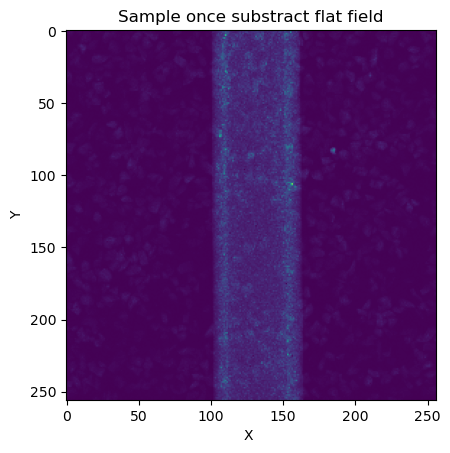

In [12]:
plt.imshow(img3)
plt.xlabel("X ")
plt.ylabel("Y")
plt.title("Sample once substract flat field")
plt.savefig("Sample_subs_FFdata.png")


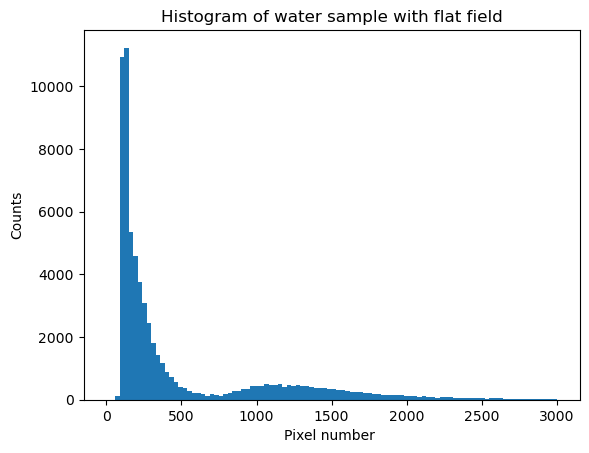

In [13]:

plt.hist(np.ravel(img3), bins=100, range=(0,3000))
plt.xlabel("Pixel number ")
plt.ylabel("Counts")
plt.title("Histogram of water sample with flat field")
plt.savefig("Histogram_sampleFF.png")


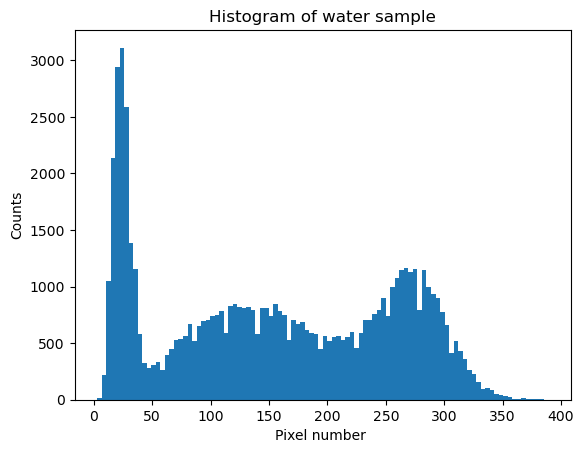

In [14]:
plt.hist(np.ravel(agua_data), bins=100)
plt.xlabel("Pixel number ")
plt.ylabel("Counts")
plt.title("Histogram of water sample")
plt.savefig("Histogram_water_sample.png")

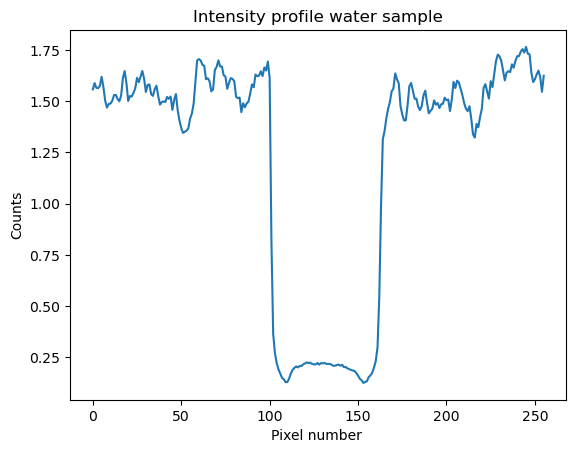

In [15]:
#perfil = img2[0, :]

perfil = np.sum(img2, axis=0)



plt.plot(perfil)
plt.xlabel("Pixel number ")
plt.ylabel("Counts")
plt.title("Intensity profile water sample")
plt.savefig("profile_water.png")


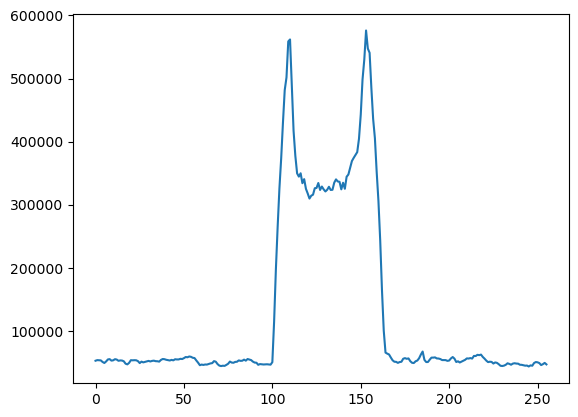

In [16]:
perfil = np.sum(img3, axis=0)


plt.plot(perfil)